# NYC Motor Vehicle Collisions data analysis and visualization
## Data Exploration and understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv
dfcsv = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")#date.value_counts()
dfcsv.head()

C:\Users\Roshan Sridhar\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/29/2018,0:00,BRONX,10472,40.826400,-73.875810,"(40.8264, -73.87581)",MANOR AVENUE,WATSON AVENUE,NaN,...,NaN,NaN,NaN,NaN,3890105,TAXI,TAXI,NaN,NaN,NaN
1,04/29/2018,0:00,MANHATTAN,10014,40.732185,-74.000626,"(40.732185, -74.000626)",NaN,NaN,361 AVENUE OF THE AMERICAS,...,Driver Inattention/Distraction,NaN,NaN,NaN,3890486,TAXI,TAXI,NaN,NaN,NaN
2,04/29/2018,0:00,QUEENS,11368,40.740562,-73.850010,"(40.740562, -73.85001)",CORONA AVENUE,SAULTELL AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3890942,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN
3,04/29/2018,0:00,NaN,NaN,40.845190,-73.911200,"(40.84519, -73.9112)",CROSS BRONX EXPY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3890364,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
4,04/29/2018,0:01,QUEENS,11420,40.666120,-73.822250,"(40.66612, -73.82225)",NORTH CONDUIT AVENUE,LEFFERTS BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3891466,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [71]:
# List of columns in the dataset
dfcsv.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [4]:
# List of contributing factors to accidents in descending order of occurances
dfcsv['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              591979
Driver Inattention/Distraction                           189029
Failure to Yield Right-of-Way                             61318
Fatigued/Drowsy                                           48554
Backing Unsafely                                          40597
Other Vehicular                                           37607
Following Too Closely                                     37100
Turning Improperly                                        30768
Lost Consciousness                                        20305
Passing or Lane Usage Improper                            17327
Traffic Control Disregarded                               17152
Driver Inexperience                                       16442
Prescription Medication                                   15908
Unsafe Lane Changing                                      14610
Pavement Slippery                                         12848
Outside Car Distraction                 

In [5]:
# List of vehicles in accidents in descending order of occurances
dfcsv['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                 709422
SPORT UTILITY / STATION WAGON     310304
TAXI                               49974
VAN                                26957
OTHER                              24701
PICK-UP TRUCK                      23604
UNKNOWN                            20722
SMALL COM VEH(4 TIRES)             14874
LARGE COM VEH(6 OR MORE TIRES)     14117
BUS                                14056
LIVERY VEHICLE                      9615
MOTORCYCLE                          6892
BICYCLE                             6034
TK                                  2579
AMBULANCE                           2479
BU                                  2066
DS                                  1038
FIRE TRUCK                           844
VN                                   657
DP                                   371
CONV                                 355
SCOOTER                              302
FB                                   244
AM                                   241
PK              

In [7]:
# Converting the date column to its specified data type
dfcsv['DATE'] = pd.to_datetime(dfcsv.DATE)

In [8]:
# Creating three new columns for easy querying
dfcsv['YEAR'] = dfcsv.DATE.dt.year
dfcsv['MONTH'] = dfcsv.DATE.dt.month
dfcsv['DAY'] = dfcsv.DATE.dt.day
dfcsv.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,MONTH,DAY
0,2018-04-29,0:00,BRONX,10472,40.826400,-73.875810,"(40.8264, -73.87581)",MANOR AVENUE,WATSON AVENUE,NaN,...,NaN,3890105,TAXI,TAXI,NaN,NaN,NaN,2018,4,29
1,2018-04-29,0:00,MANHATTAN,10014,40.732185,-74.000626,"(40.732185, -74.000626)",NaN,NaN,361 AVENUE OF THE AMERICAS,...,NaN,3890486,TAXI,TAXI,NaN,NaN,NaN,2018,4,29
2,2018-04-29,0:00,QUEENS,11368,40.740562,-73.850010,"(40.740562, -73.85001)",CORONA AVENUE,SAULTELL AVENUE,NaN,...,NaN,3890942,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,2018,4,29
3,2018-04-29,0:00,NaN,NaN,40.845190,-73.911200,"(40.84519, -73.9112)",CROSS BRONX EXPY,NaN,NaN,...,NaN,3890364,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2018,4,29
4,2018-04-29,0:01,QUEENS,11420,40.666120,-73.822250,"(40.66612, -73.82225)",NORTH CONDUIT AVENUE,LEFFERTS BOULEVARD,NaN,...,NaN,3891466,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2018,4,29


## Filter and limit the dataset for importing to Carto
Since Carto has a file limitation of 150 MB and a maximum row limit of 500k rows per dataset, we filter the maximum data possible to be visualized on the map

In [253]:
# Considering columns beneficial for visualizing on carto
df_locs = dfcsv[['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'UNIQUE KEY']]
df_locs.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,UNIQUE KEY
0,2018-04-29,0:00,BRONX,10472,40.826400,-73.875810,"(40.8264, -73.87581)",3890105
1,2018-04-29,0:00,MANHATTAN,10014,40.732185,-74.000626,"(40.732185, -74.000626)",3890486
2,2018-04-29,0:00,QUEENS,11368,40.740562,-73.850010,"(40.740562, -73.85001)",3890942
3,2018-04-29,0:00,NaN,NaN,40.845190,-73.911200,"(40.84519, -73.9112)",3890364
4,2018-04-29,0:01,QUEENS,11420,40.666120,-73.822250,"(40.66612, -73.82225)",3891466


In [132]:
# Observing datatypes
df_locs.dtypes

DATE          datetime64[ns]
TIME                  object
BOROUGH               object
ZIP CODE              object
LATITUDE             float64
LONGITUDE            float64
LOCATION              object
UNIQUE KEY             int64
dtype: object

In [133]:
# We notice that zip codes are of object datatype instead of the required integer data type
df_locs = df_locs[pd.notnull(df_locs['ZIP CODE'])]

In [134]:
# Converting zip codes datatype to numeric
df_locs['ZIP CODE'] = pd.to_numeric(df_locs['ZIP CODE'], errors='coerce')

In [135]:
# Removing outliers and unrecorded zip code values from the data( i.e. zero values and those outside the NTC city limits)
df_locs = df_locs[(df_locs['LATITUDE'] > 0.1) & (df_locs['LATITUDE'] < 41)]

In [136]:
# Observing the dataset for integrity
df_locs.sort_values('LATITUDE')

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,UNIQUE KEY
874937,2014-05-19,17:20,STATEN ISLAND,10307.0,40.498949,-74.244365,"(40.4989488, -74.2443651)",341158
1185494,2012-11-05,11:15,STATEN ISLAND,10307.0,40.498949,-74.244365,"(40.4989488, -74.2443651)",301815
502251,2016-02-12,23:59,STATEN ISLAND,10307.0,40.499135,-74.243485,"(40.4991346, -74.2434848)",3388712
95223,2017-11-21,21:00,STATEN ISLAND,10307.0,40.499310,-74.242630,"(40.49931, -74.24263)",3794971
693300,2015-04-03,17:45,STATEN ISLAND,10307.0,40.499479,-74.241728,"(40.4994787, -74.2417278)",3197750
559809,2015-11-07,11:35,STATEN ISLAND,10307.0,40.499659,-74.240822,"(40.499659, -74.2408224)",3330320
896979,2014-04-10,17:20,STATEN ISLAND,10307.0,40.499842,-74.239917,"(40.499842, -74.2399169)",319011
1056903,2013-06-26,10:10,STATEN ISLAND,10307.0,40.499842,-74.239917,"(40.499842, -74.2399169)",302914
21046,2018-03-25,17:30,STATEN ISLAND,10307.0,40.500023,-74.239020,"(40.500023, -74.23902)",3869029
960666,2013-12-13,16:35,STATEN ISLAND,10307.0,40.500025,-74.239012,"(40.5000251, -74.2390115)",303732


In [137]:
# Obtaining total number of collisions for each zip code
df_locs['ZIP CODE'].value_counts().to_frame().reset_index().rename(columns={"ZIP CODE": "ZIP COUNTS"})

,index,ZIP COUNTS
0,11207.0,15197
1,11101.0,12257
2,10016.0,11779
3,10019.0,11583
4,10022.0,11469
5,10036.0,11215
6,11201.0,10853
7,10001.0,10814
8,11203.0,10522
9,11236.0,10154


In [138]:
# Merging the dataframe for carto with above zip counts
df_locs = pd.merge(df_locs, df_locs['ZIP CODE'].value_counts().to_frame().reset_index().rename(columns={"ZIP CODE": "ZIP COUNTS"}),
        how='left', left_on='ZIP CODE', right_on='index'
        ).drop(columns='index')

In [139]:
# Limiting to most recent 500k rows
df_locs.sort_values('DATE', ascending=False)[:499999].to_csv('dropped_500k_wCounts.csv', index=False)

In [140]:
# Oserving the dates of the data will be imported
pd.read_csv('dropped_500k_wCounts.csv')[['DATE']].sort_values('DATE', ascending=False)

,DATE
0,2018-04-29
182,2018-04-29
168,2018-04-29
169,2018-04-29
170,2018-04-29
171,2018-04-29
172,2018-04-29
173,2018-04-29
174,2018-04-29
175,2018-04-29


## Collisions over the years

In [43]:
# Preparing data to observe the number of collisions over the years

time_df = dfcsv[['DATE', 'TIME', 'UNIQUE KEY', 'BOROUGH', 'YEAR', 'MONTH', 'DAY']]
print(time_df.shape)
print(time_df.head())

(1254871, 7)
        DATE  TIME  UNIQUE KEY    BOROUGH  YEAR  MONTH  DAY
0 2018-04-29  0:00     3890105      BRONX  2018      4   29
1 2018-04-29  0:00     3890486  MANHATTAN  2018      4   29
2 2018-04-29  0:00     3890942     QUEENS  2018      4   29
3 2018-04-29  0:00     3890364        NaN  2018      4   29
4 2018-04-29  0:01     3891466     QUEENS  2018      4   29


In [44]:
# Total number of records for each year
time_df.DATE.groupby(time_df.DATE.dt.year).count()

DATE
2012    100537
2013    203722
2014    206022
2015    217668
2016    227818
2017    229347
2018     69757
Name: DATE, dtype: int64

<IPython.core.display.Javascript object>


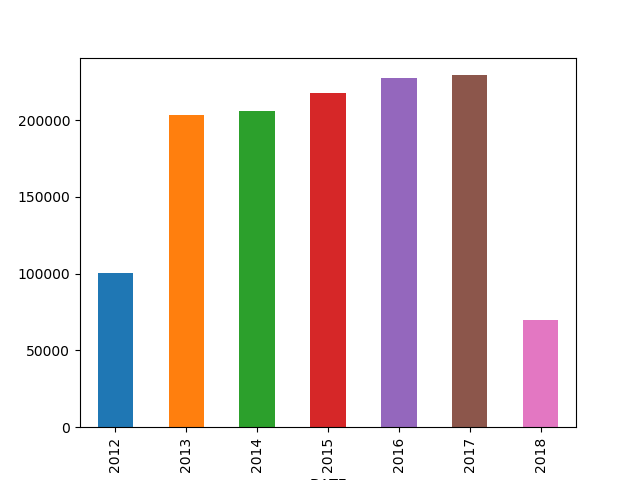

In [45]:
%matplotlib notebook
# Total number of collisions per year
time_df.DATE.groupby(time_df.DATE.dt.year).count().plot(kind='bar')

In [46]:
# Preparing data for obtaining collision counts per year per borough
time_df[['YEAR', 'BOROUGH', 'UNIQUE KEY']].head()

,YEAR,BOROUGH,UNIQUE KEY
0,2018,BRONX,3890105
1,2018,MANHATTAN,3890486
2,2018,QUEENS,3890942
3,2018,NaN,3890364
4,2018,QUEENS,3891466


In [47]:
# Group by and aggregation
ptime = time_df[['YEAR', 'BOROUGH', 'UNIQUE KEY']].groupby(['YEAR', 'BOROUGH']).count().reset_index()
ptime.head()

,YEAR,BOROUGH,UNIQUE KEY
0,2012,BRONX,9510
1,2012,BROOKLYN,23302
2,2012,MANHATTAN,20719
3,2012,QUEENS,19139
4,2012,STATEN ISLAND,4902


In [48]:
# Exporting resulting data for visualization
ptime.to_csv('viz_block_1_long.csv', index=False)

In [49]:
# Obtaining pivot table for easier visualizations
pd.pivot_table(ptime, columns='YEAR', index='BOROUGH', values='UNIQUE KEY')

YEAR,2012,2013,2014,2015,2016,2017,2018
BOROUGH,,,,,,,
BRONX,9510,19768,19687,21252,21703,21191,6839
BROOKLYN,23302,47017,47757,50844,47698,44649,14148
MANHATTAN,20719,41578,41262,42518,36768,31497,9679
QUEENS,19139,39310,41019,42487,41556,38381,12524
STATEN ISLAND,4902,8295,6614,6344,6720,6214,1865


In [64]:
# Exporting resulting data for visualization
pd.pivot_table(ptime, columns='YEAR', index='BOROUGH', values='UNIQUE KEY').to_csv('viz_block_1_pivot.csv')#, index=False)

<IPython.core.display.Javascript object>


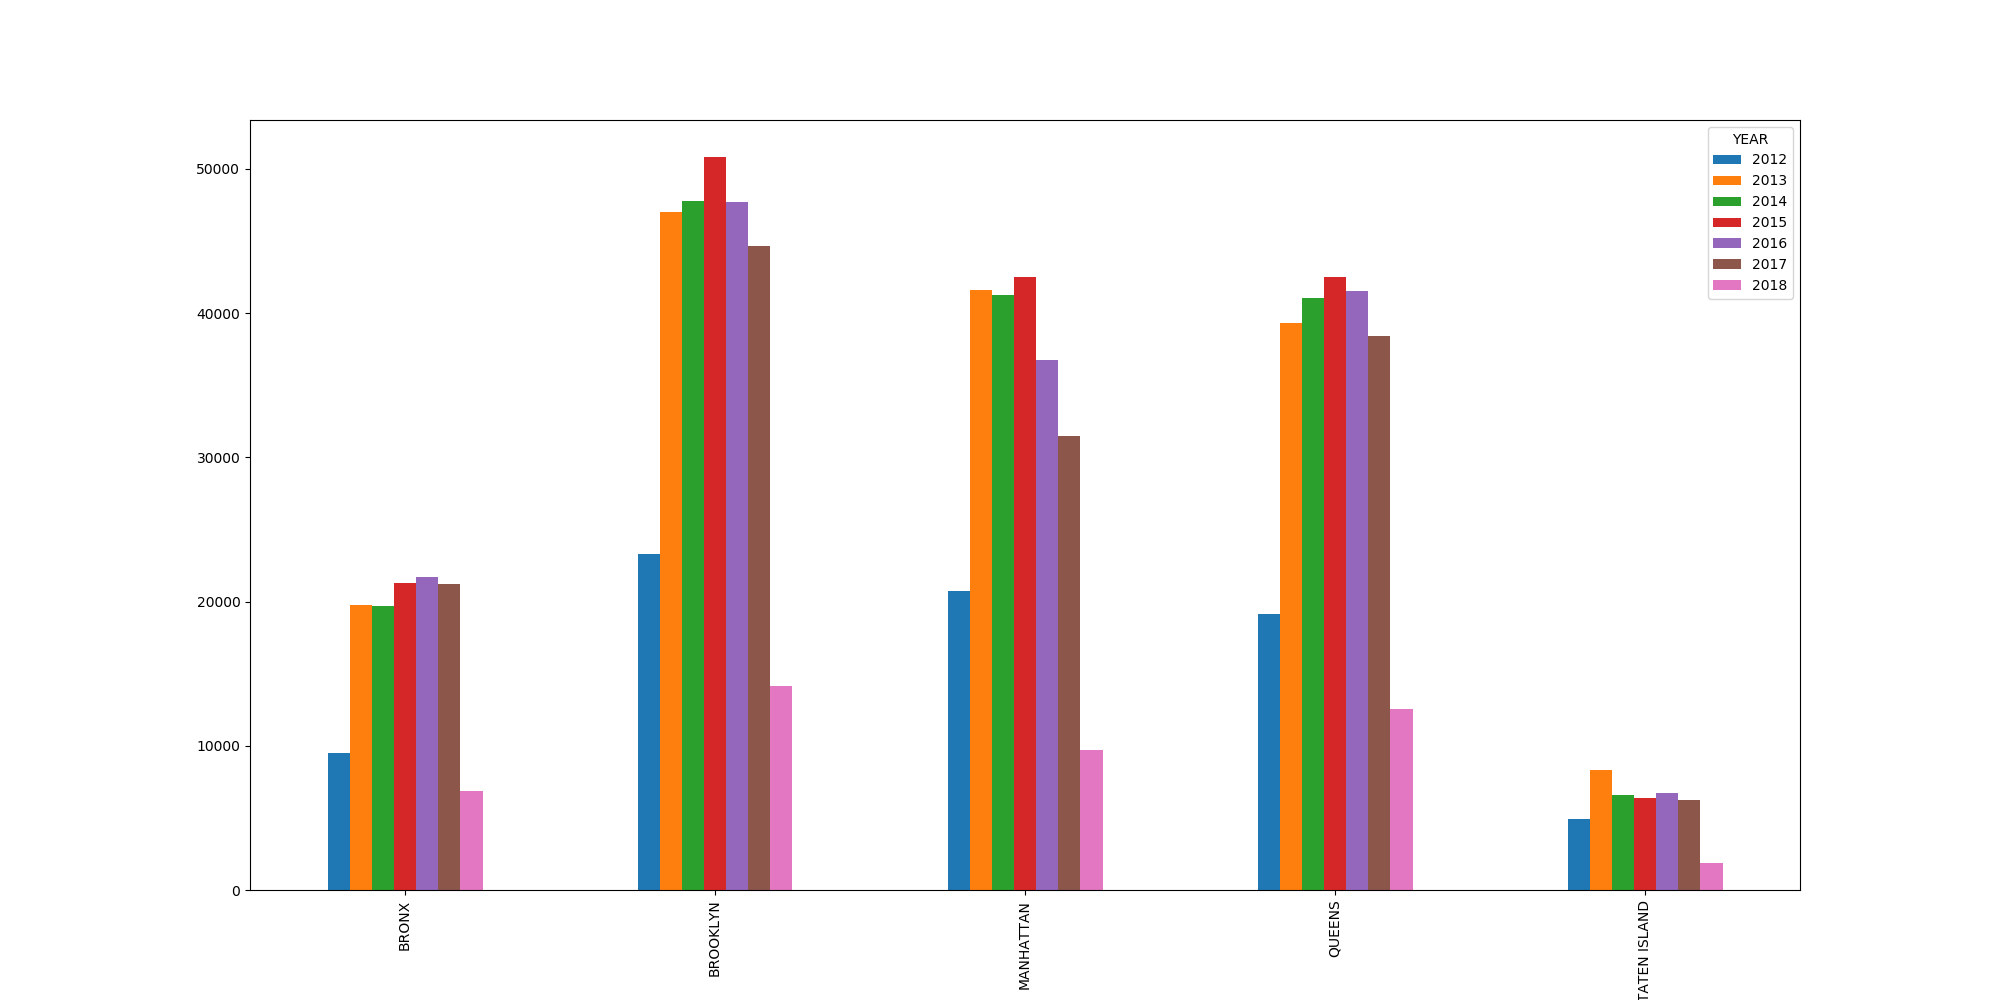

In [51]:
# Visualizing pivot table for collisions per year per borough
pd.pivot_table(ptime, columns='YEAR', index='BOROUGH', values='UNIQUE KEY').plot(kind='bar', figsize=(20, 10))

## Causes and contriburing factors for Collisions

In [219]:
# Extracting required data to visualize the contributing factors for accidents 
fact_df = dfcsv[['DATE', 'TIME', 'UNIQUE KEY', 'BOROUGH', 'YEAR', 'MONTH', 'DAY', 'CONTRIBUTING FACTOR VEHICLE 1']]
print(fact_df.shape)
print(fact_df.head())

(1254871, 8)
        DATE  TIME  UNIQUE KEY    BOROUGH  YEAR  MONTH  DAY  \
0 2018-04-29  0:00     3890105      BRONX  2018      4   29   
1 2018-04-29  0:00     3890486  MANHATTAN  2018      4   29   
2 2018-04-29  0:00     3890942     QUEENS  2018      4   29   
3 2018-04-29  0:00     3890364        NaN  2018      4   29   
4 2018-04-29  0:01     3891466     QUEENS  2018      4   29   

    CONTRIBUTING FACTOR VEHICLE 1  
0                     Unspecified  
1  Driver Inattention/Distraction  
2  Driver Inattention/Distraction  
3  Driver Inattention/Distraction  
4            Unsafe Lane Changing  


In [220]:
# Grouping and counting by year
fact_df.groupby(fact_df.DATE.dt.year).count()

,DATE,TIME,UNIQUE KEY,BOROUGH,YEAR,MONTH,DAY,CONTRIBUTING FACTOR VEHICLE 1
DATE,,,,,,,,
2012,100537,100537,100537,77572,100537,100537,100537,100537
2013,203722,203722,203722,155968,203722,203722,203722,203470
2014,206022,206022,206022,156339,206022,206022,206022,205555
2015,217668,217668,217668,163445,217668,217668,217668,216863
2016,227818,227818,227818,154445,227818,227818,227818,225587
2017,229347,229347,229347,141932,229347,229347,229347,227723
2018,69757,69757,69757,45055,69757,69757,69757,68189


In [234]:
# Renaming the fields to make it filename friendly
fact_df['CONTRIBUTING FACTOR VEHICLE 1'] = fact_df['CONTRIBUTING FACTOR VEHICLE 1'].str.replace('/', '--')#.str.replace(' ', '_')

C:\Users\Roshan Sridhar\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [236]:
# Creating a list for top 20 most impacting ones out of the 100s of contributing factors
top20_factors_list = fact_df[['YEAR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'UNIQUE KEY']]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().to_frame().index.tolist()[1:21]
# top20_factors_list = [s.replace('/', '--') for s in top20_factors_list]
# top20_factors_list = [s.replace(' ', '_') for s in top20_factors_list]
top20_factors_list

['Driver Inattention--Distraction',
 'Failure to Yield Right-of-Way',
 'Fatigued--Drowsy',
 'Backing Unsafely',
 'Other Vehicular',
 'Following Too Closely',
 'Turning Improperly',
 'Lost Consciousness',
 'Passing or Lane Usage Improper',
 'Traffic Control Disregarded',
 'Driver Inexperience',
 'Prescription Medication',
 'Unsafe Lane Changing',
 'Pavement Slippery',
 'Outside Car Distraction',
 'Alcohol Involvement',
 'Physical Disability',
 'Oversized Vehicle',
 'Reaction to Other Uninvolved Vehicle',
 'Unsafe Speed']

In [237]:
# Grouping data by year, borough and factor
fact_df[['YEAR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'UNIQUE KEY']].groupby(['YEAR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).count()

UNIQUE KEY
YEAR BOROUGH       CONTRIBUTING FACTOR VEHICLE 1                                 
2012 BRONX         Accelerator Defective                                        4
                   Aggressive Driving--Road Rage                               48
                   Alcohol Involvement                                         93
                   Animals Action                                               5
                   Backing Unsafely                                           282
                   Brakes Defective                                            32
                   Cell Phone (hands-free)                                      1
                   Driver Inattention--Distraction                           1024
                   Driver Inexperience                                        149
                   Drugs (Illegal)                                              6
                   Failure to Keep Right                                       15
                   Failure to Yield Right-of-Way                              390
                   Fatigued--Drowsy                                           256
                   Fell Asleep                                                 25
                   Following Too Closely                                        6
                   Glare                                                       16
                   Headlights Defective                                         2
                   Illness                                                     22
                   Lane Marking Improper--Inadequate                            5
                   Lost Consciousness                                         133
                   Obstruction--Debris                                         24
                   Other Electronic Device                                     28
                   Other Vehicular                                            250
                   Outside Car Distraction                                    113
                   Oversized Vehicle                                           56
                   Passenger Distraction                                       49
                   Passing or Lane Usage Improper                              10
                   Pavement Defective                                           5
                   Pavement Slippery                                           54
                   Pedestrian--Bicyclist--Other Pedestrian Error--...           2
...                                                                           ...
2018 STATEN ISLAND Drugs (Illegal)                                              3
                   Failure to Keep Right                                        8
                   Failure to Yield Right-of-Way                              145
                   Fatigued--Drowsy                                             4
                   Fell Asleep                                                  2
                   Following Too Closely                                      153
                   Glare                                                       15
                   Illness                                                      3
                   Lost Consciousness                                           2
                   Obstruction--Debris                                          8
                   Other Electronic Device                                      1
                   Other Vehicular                                             19
                   Outside Car Distraction                                      9
                   Oversized Vehicle                                           13
                   Passenger Distraction                                        4
                   Passing or Lane Usage Improper                              52
                   Pavement Defective                

In [238]:
pfact = fact_df[['YEAR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'UNIQUE KEY']].groupby(['YEAR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).count().reset_index()

In [239]:
# Dropping the contributing factor "Unspecified" from the data
pfact = pfact.drop(pfact[pfact['CONTRIBUTING FACTOR VEHICLE 1']=='Unspecified'].index)

In [240]:
# Filtering data based on only the top 20 factors
pfact = pfact[pfact['CONTRIBUTING FACTOR VEHICLE 1'].isin(top20_factors_list)]

In [241]:
pfact.head()

,YEAR,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY
2,2012,BRONX,Alcohol Involvement,93
4,2012,BRONX,Backing Unsafely,282
7,2012,BRONX,Driver Inattention--Distraction,1024
8,2012,BRONX,Driver Inexperience,149
11,2012,BRONX,Failure to Yield Right-of-Way,390


In [243]:
# Creating a pivto table to generate visualizations
pd.pivot_table(pfact, columns='YEAR', index=['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'], values='UNIQUE KEY').xs('Alcohol Involvement', level=1)

YEAR,2012,2013,2014,2015,2016,2017,2018
BOROUGH,,,,,,,
BRONX,93.0,194.0,201.0,204.0,150.0,259.0,75.0
BROOKLYN,154.0,316.0,376.0,407.0,337.0,572.0,133.0
MANHATTAN,102.0,256.0,274.0,212.0,176.0,234.0,61.0
QUEENS,191.0,353.0,428.0,454.0,336.0,499.0,151.0
STATEN ISLAND,25.0,54.0,82.0,72.0,68.0,97.0,20.0


In [244]:
# Creating a fuction to automate the visualization and data creation
def factor_stat_csv(factor):
    pd.pivot_table(pfact, columns='YEAR', index=['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'], values='UNIQUE KEY').xs(factor, level=1).to_csv('viz3_factor_pivot_'+factor+'.csv')
    print('viz3_factor_pivot_'+factor+'.csv created')

In [245]:
for fac in top20_factors_list:
    factor_stat_csv(fac)

viz3_factor_pivot_Driver Inattention--Distraction.csv created
viz3_factor_pivot_Failure to Yield Right-of-Way.csv created
viz3_factor_pivot_Fatigued--Drowsy.csv created
viz3_factor_pivot_Backing Unsafely.csv created
viz3_factor_pivot_Other Vehicular.csv created
viz3_factor_pivot_Following Too Closely.csv created
viz3_factor_pivot_Turning Improperly.csv created
viz3_factor_pivot_Lost Consciousness.csv created
viz3_factor_pivot_Passing or Lane Usage Improper.csv created
viz3_factor_pivot_Traffic Control Disregarded.csv created
viz3_factor_pivot_Driver Inexperience.csv created
viz3_factor_pivot_Prescription Medication.csv created
viz3_factor_pivot_Unsafe Lane Changing.csv created
viz3_factor_pivot_Pavement Slippery.csv created
viz3_factor_pivot_Outside Car Distraction.csv created
viz3_factor_pivot_Alcohol Involvement.csv created
viz3_factor_pivot_Physical Disability.csv created
viz3_factor_pivot_Oversized Vehicle.csv created
viz3_factor_pivot_Reaction to Other Uninvolved Vehicle.csv creat

In [251]:
# Creating a function to visualize
def factor_stat(fac):
    pd.pivot_table(pfact, columns='YEAR', index=['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1'], values='UNIQUE KEY').xs(fac, level=1).plot(kind='bar', title=fac)

<IPython.core.display.Javascript object>


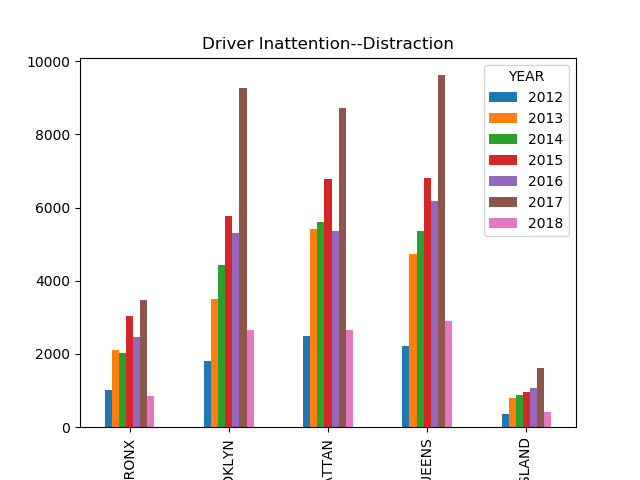

<IPython.core.display.Javascript object>


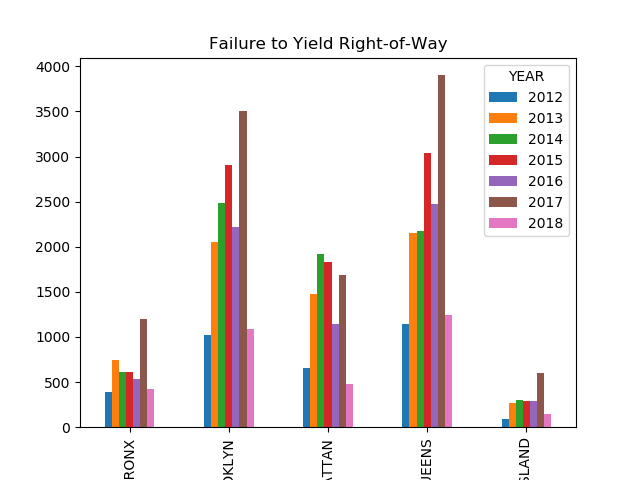

<IPython.core.display.Javascript object>


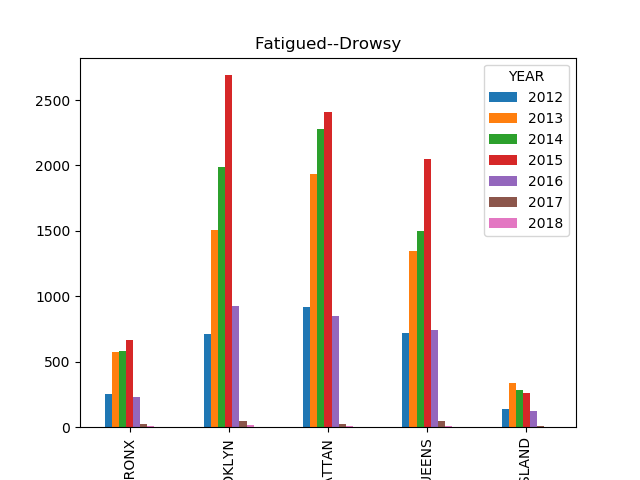

<IPython.core.display.Javascript object>


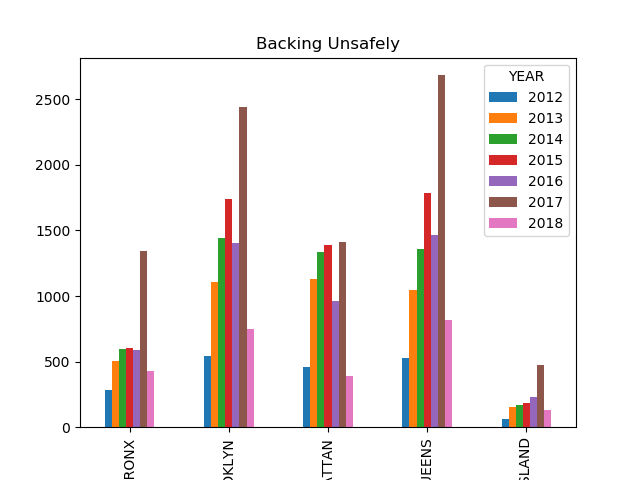

<IPython.core.display.Javascript object>


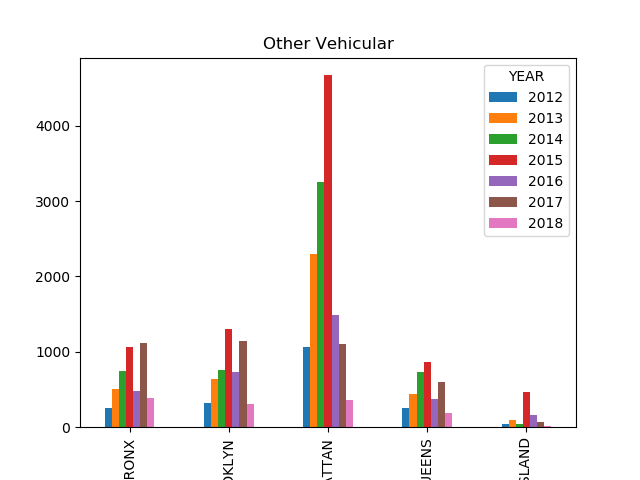

<IPython.core.display.Javascript object>


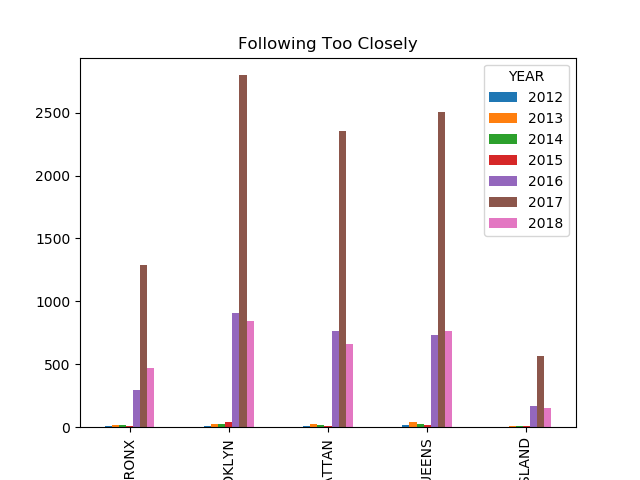

<IPython.core.display.Javascript object>


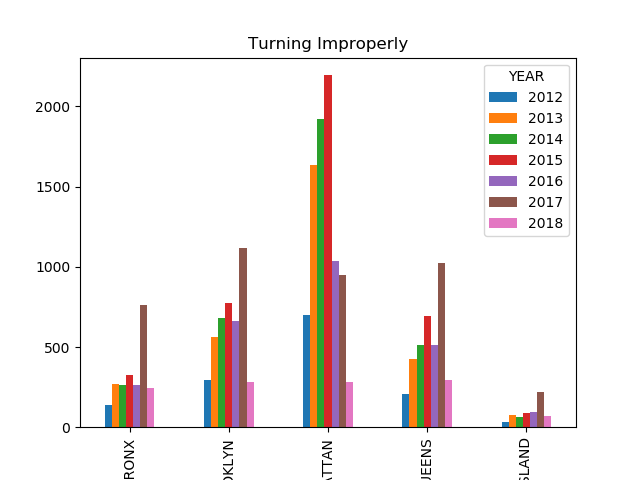

<IPython.core.display.Javascript object>


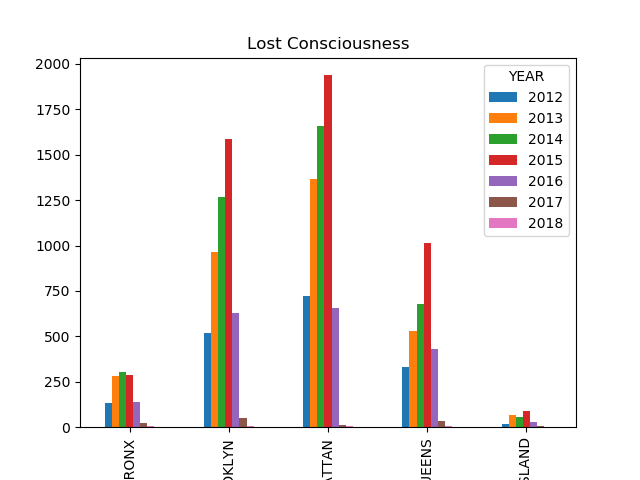

<IPython.core.display.Javascript object>


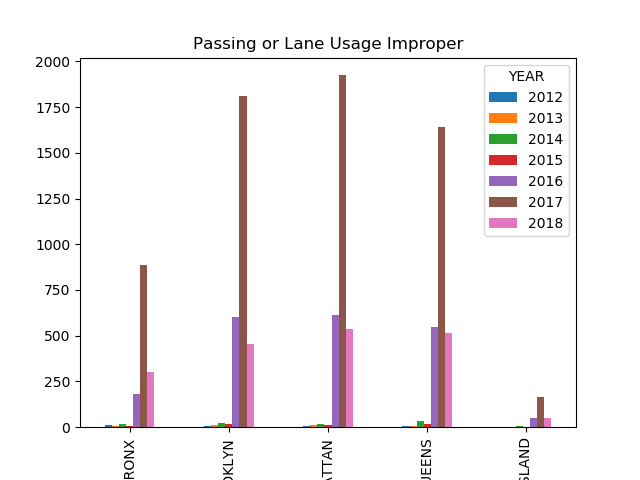

<IPython.core.display.Javascript object>


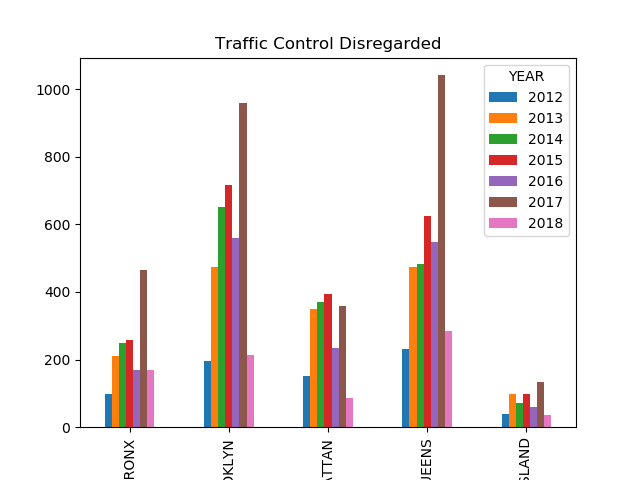

<IPython.core.display.Javascript object>


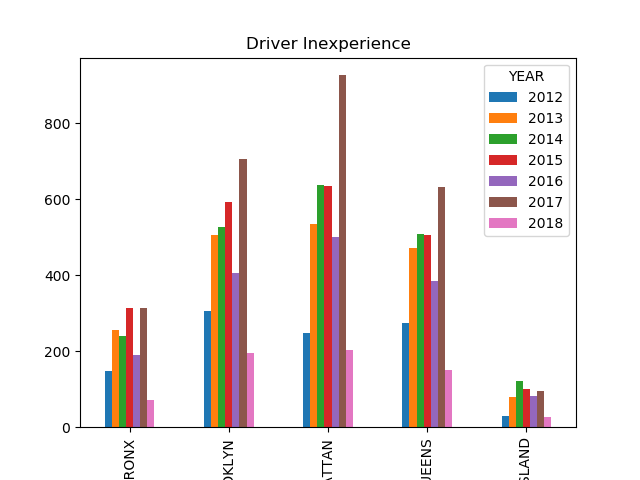

<IPython.core.display.Javascript object>


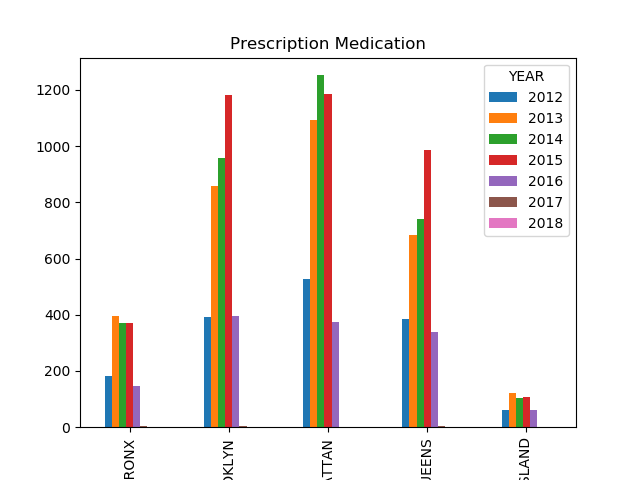

<IPython.core.display.Javascript object>


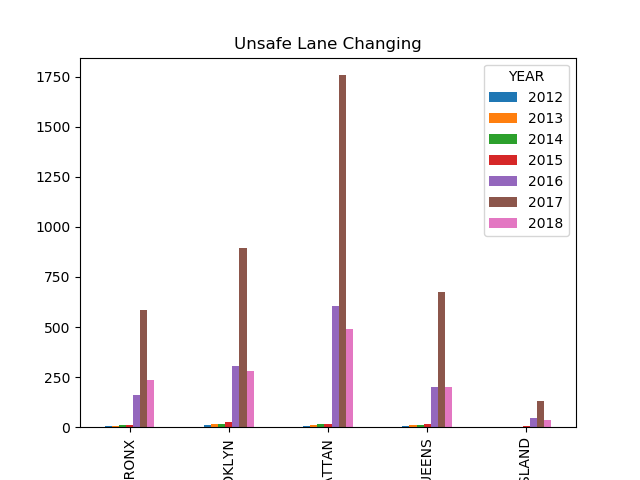

<IPython.core.display.Javascript object>


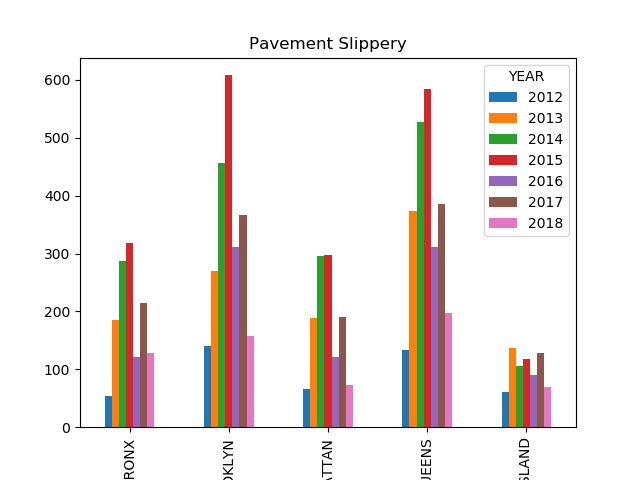

<IPython.core.display.Javascript object>


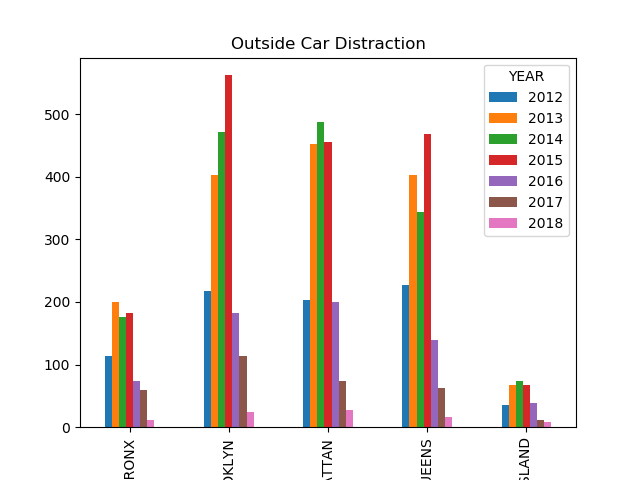

<IPython.core.display.Javascript object>


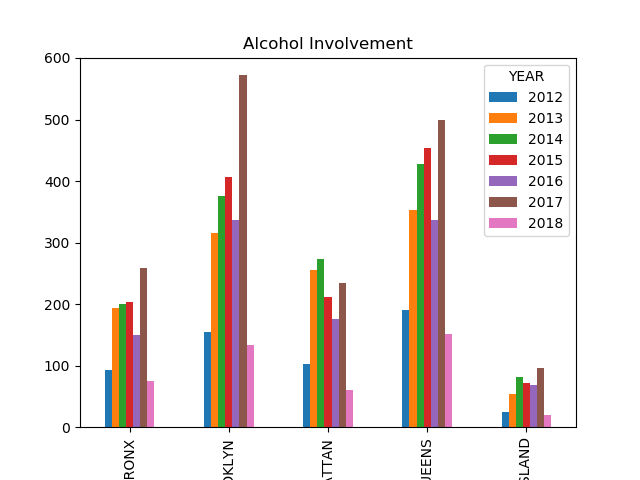

<IPython.core.display.Javascript object>


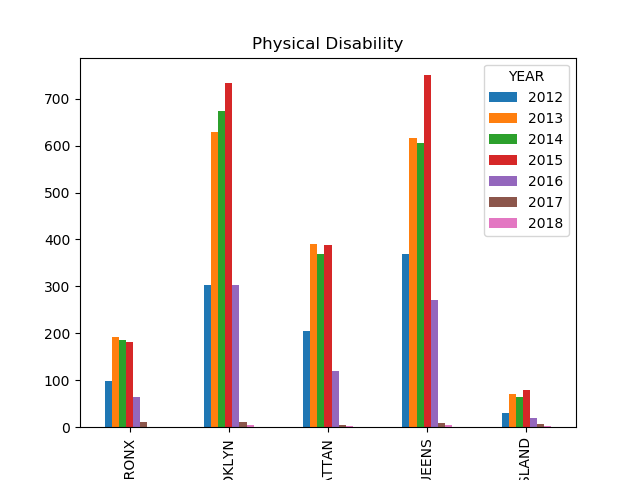

<IPython.core.display.Javascript object>


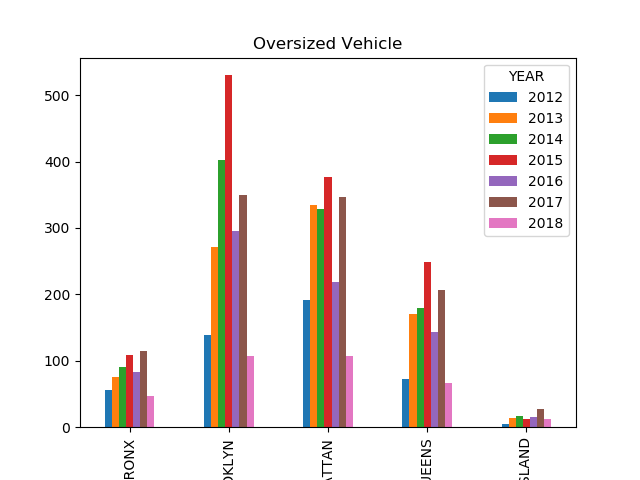

C:\Users\Roshan Sridhar\Miniconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


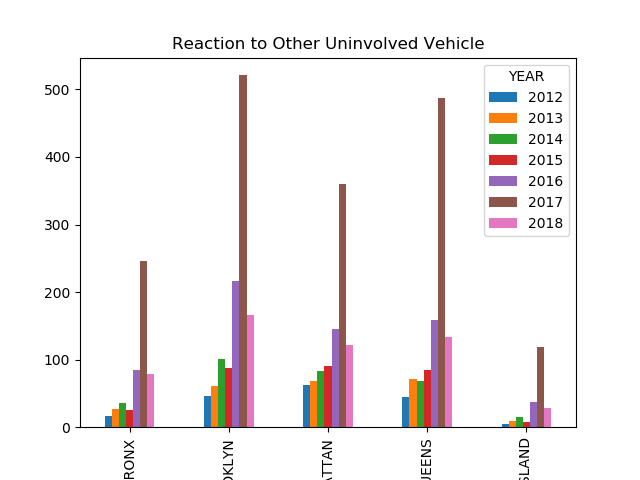

<IPython.core.display.Javascript object>


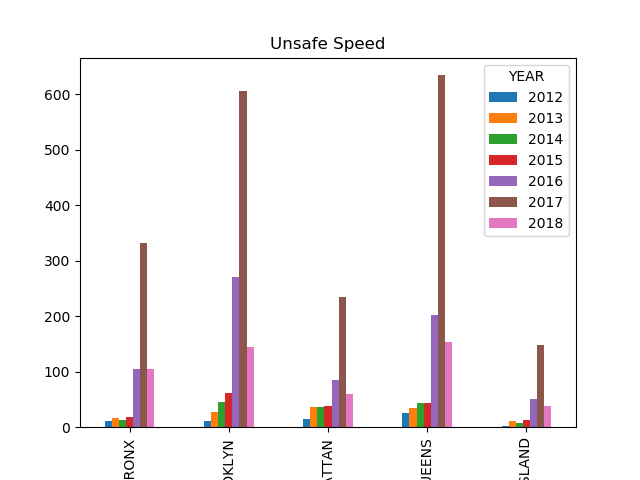

In [252]:
# Visualizing top 20 factors
for f in top20_factors_list:
    factor_stat(f)

# mode filter

In [58]:
# Filtering data for type of injuries
mode_df = dfcsv[['DATE', 'TIME', 'UNIQUE KEY', 'BOROUGH', 'YEAR', 'MONTH', 'DAY', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']]
print(mode_df.shape)
print(mode_df.head())

(1254871, 15)
        DATE  TIME  UNIQUE KEY    BOROUGH  YEAR  MONTH  DAY  \
0 2018-04-29  0:00     3890105      BRONX  2018      4   29   
1 2018-04-29  0:00     3890486  MANHATTAN  2018      4   29   
2 2018-04-29  0:00     3890942     QUEENS  2018      4   29   
3 2018-04-29  0:00     3890364        NaN  2018      4   29   
4 2018-04-29  0:01     3891466     QUEENS  2018      4   29   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              0                            

In [59]:
# View
mode_df[['YEAR', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'UNIQUE KEY']]

,YEAR,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
0,2018,BRONX,0,0,0,0,0,0,0,0,3890105
1,2018,MANHATTAN,0,0,0,0,0,0,0,0,3890486
2,2018,QUEENS,0,0,0,0,0,0,0,0,3890942
3,2018,NaN,0,0,0,0,0,0,0,0,3890364
4,2018,QUEENS,0,0,0,0,0,0,0,0,3891466
5,2018,BROOKLYN,1,0,0,0,0,0,1,0,3889934
6,2018,MANHATTAN,0,0,0,0,0,0,0,0,3890918
7,2018,QUEENS,1,0,1,0,0,0,0,0,3890867
8,2018,NaN,1,0,0,0,0,0,1,0,3890043
9,2018,NaN,0,0,0,0,0,0,0,0,3889929


In [60]:
# Grouping data by year, borough 
pmode = mode_df[['YEAR', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']]\
        .groupby(['YEAR', 'BOROUGH']).sum()#.reset_index()
pmode.head()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
YEAR BOROUGH                                                              
2012 BRONX                               2878                        17   
     BROOKLYN                            7525                        33   
     MANHATTAN                           3867                        21   
     QUEENS                              5506                        28   
     STATEN ISLAND                       1245                        11   

                    NUMBER OF PEDESTRIANS INJURED  \
YEAR BOROUGH                                        
2012 BRONX                                    753   
     BROOKLYN                                1836   
     MANHATTAN                               1390   
     QUEENS                                  1172   
     STATEN ISLAND                            201   

                    NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
YEAR BOROUGH                                                                  
2012 BRONX                                     8                        155   
     BROOKLYN                                 19                        878   
     MANHATTAN                                17                        553   
     QUEENS                                   15                        402   
     STATEN ISLAND                             3                         27   

                    NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
YEAR BOROUGH                                                               
2012 BRONX                                 1                        1970   
     BROOKLYN                              2                        4805   
     MANHATTAN                             1                        1924   
     QUEENS                                2                        3932   
     STATEN ISLAND                         0                        1017   

                    NUMBER OF MOTORIST KILLED  
YEAR BOROUGH                                   
2012 BRONX                                  8  
     BROOKLYN                              12  
     MANHATTAN                              3  
     QUEENS                                11  
     STATEN ISLAND                          8

In [161]:
# Generating pivot table for visualizations
pd.pivot_table(pmode, columns='YEAR', index='BOROUGH', values='NUMBER OF PERSONS INJURED')

YEAR,2012,2013,2014,2015,2016,2017,2018
BOROUGH,,,,,,,
BRONX,2878,6259,5886,5626,5996,5748,1752
BROOKLYN,7525,15410,14245,13706,13398,11953,3640
MANHATTAN,3867,7584,6906,6529,6175,5591,1608
QUEENS,5506,10687,10031,10423,10884,10039,3042
STATEN ISLAND,1245,2111,1577,1547,1468,1544,375


In [115]:
# Creating a function to generate csvs and visualizations
# BOROUGH = 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'
mode = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
def mode_stat(mode):
    pd.pivot_table(pmode, columns='YEAR', index='BOROUGH', values=mode).plot(kind='bar', figsize=(10,5), title=mode)
def mode_stat_csv(mode):    
    pd.pivot_table(pmode, columns='YEAR', index='BOROUGH', values=mode).to_csv('viz2_mode_pivot_'+mode+'.csv')
    print('viz2_mode_pivot_'+mode+'.csv created')

In [116]:
# 'viz2_mode_'+mode[0]+'.csv'
for m in mode:
    mode_stat_csv(m)

viz2_mode_pivot_NUMBER OF PERSONS INJURED.csv created
viz2_mode_pivot_NUMBER OF PERSONS KILLED.csv created
viz2_mode_pivot_NUMBER OF PEDESTRIANS INJURED.csv created
viz2_mode_pivot_NUMBER OF PEDESTRIANS KILLED.csv created
viz2_mode_pivot_NUMBER OF CYCLIST INJURED.csv created
viz2_mode_pivot_NUMBER OF CYCLIST KILLED.csv created
viz2_mode_pivot_NUMBER OF MOTORIST INJURED.csv created
viz2_mode_pivot_NUMBER OF MOTORIST KILLED.csv created


<IPython.core.display.Javascript object>


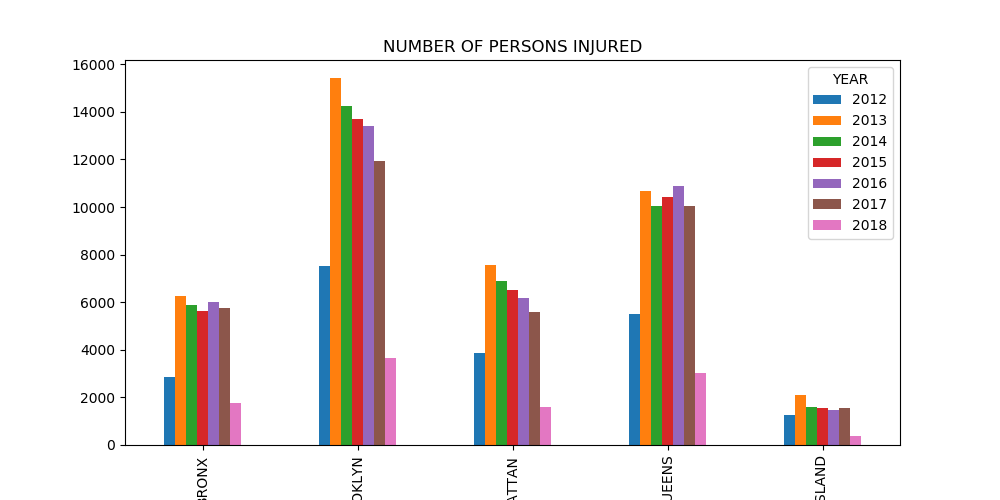

YEAR           2012   2013   2014   2015   2016   2017  2018
BOROUGH                                                     
BRONX          2878   6259   5886   5626   5996   5748  1752
BROOKLYN       7525  15410  14245  13706  13398  11953  3640
MANHATTAN      3867   7584   6906   6529   6175   5591  1608
QUEENS         5506  10687  10031  10423  10884  10039  3042
STATEN ISLAND  1245   2111   1577   1547   1468   1544   375


In [112]:
mode_stat('NUMBER OF PERSONS INJURED')

<IPython.core.display.Javascript object>


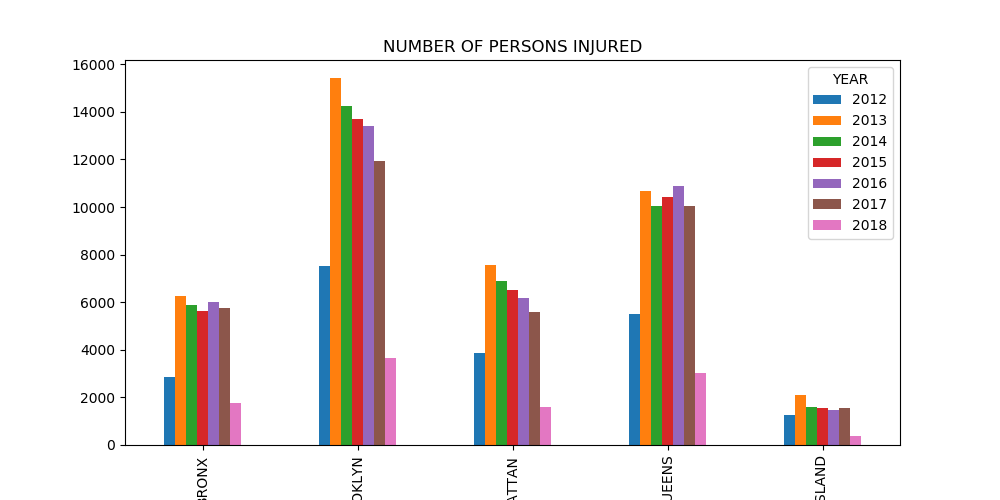

<IPython.core.display.Javascript object>


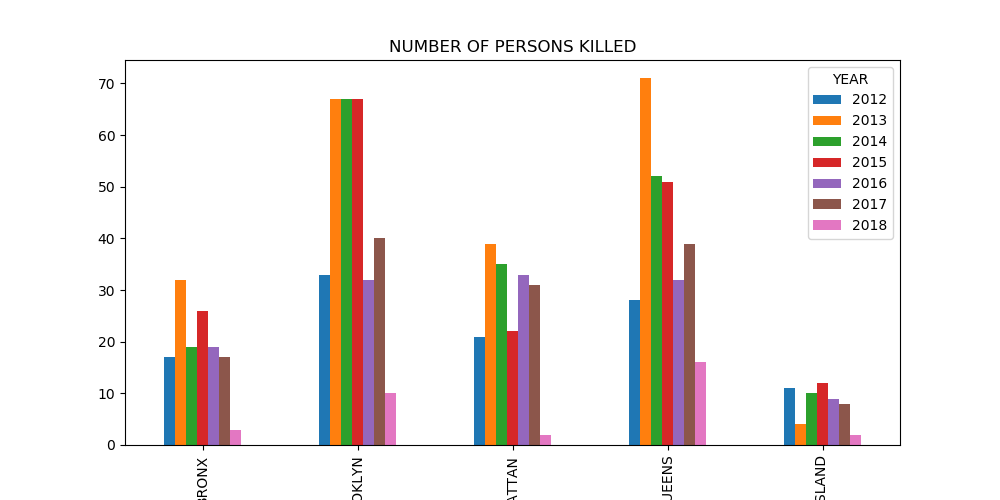

<IPython.core.display.Javascript object>


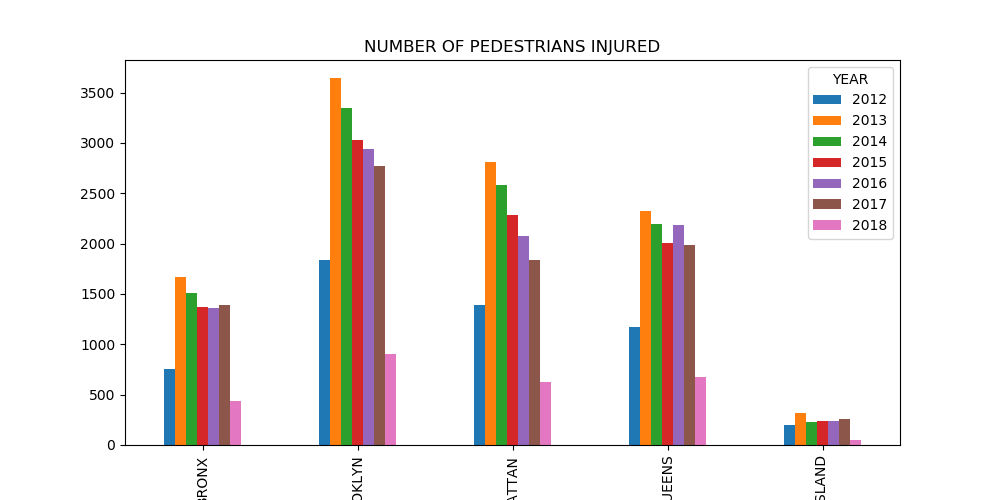

<IPython.core.display.Javascript object>


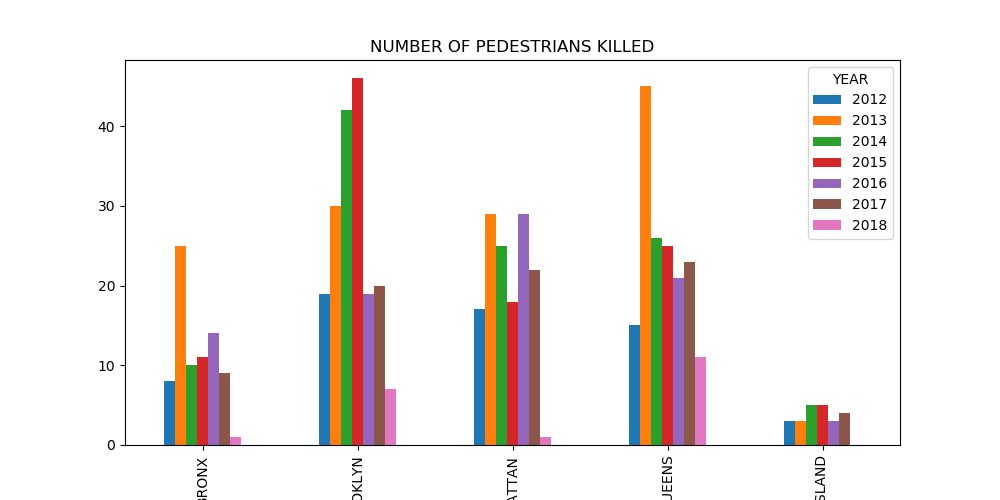

<IPython.core.display.Javascript object>


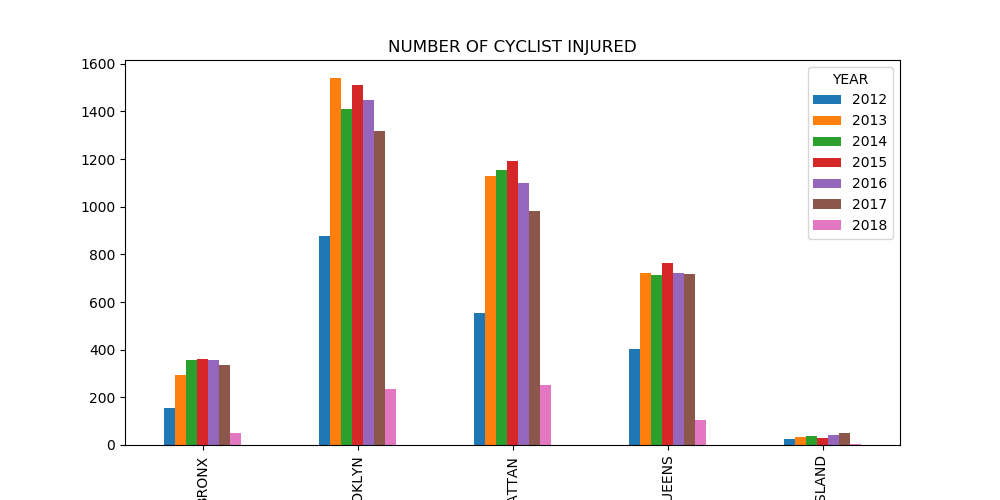

<IPython.core.display.Javascript object>


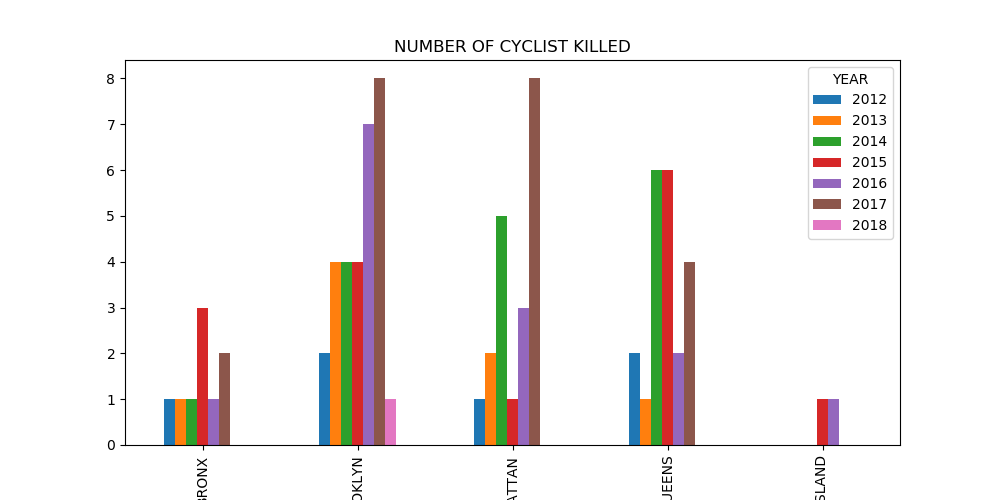

<IPython.core.display.Javascript object>


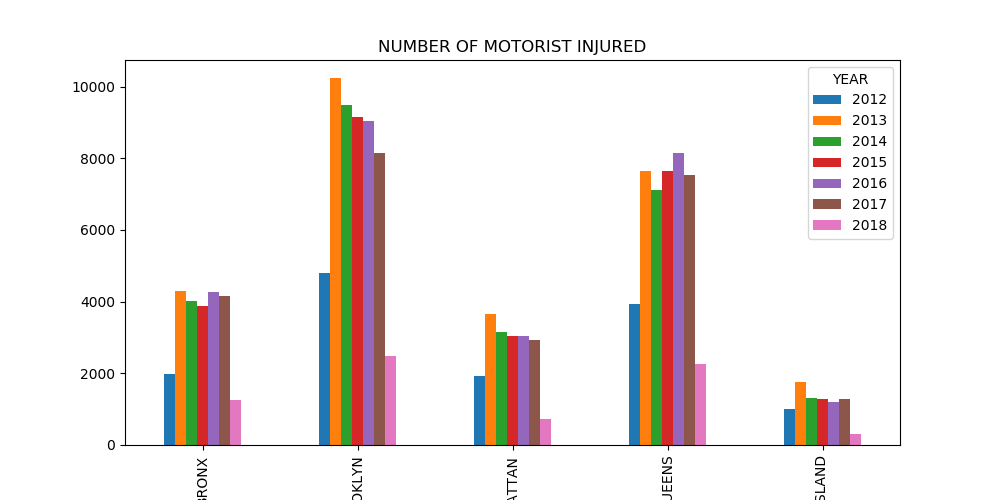

<IPython.core.display.Javascript object>


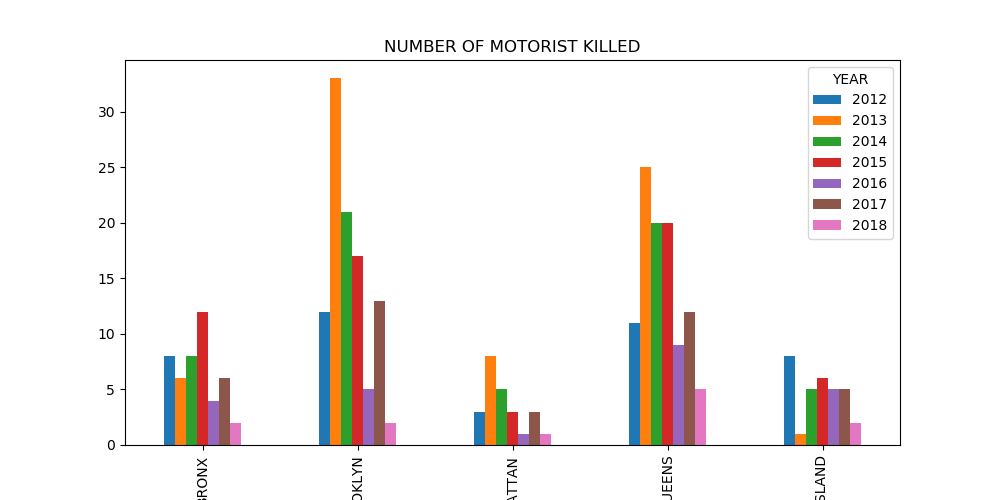

In [63]:
for m in mode:
    mode_stat(m)